## Net NOx RF bar charts, Fig 5

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
#import xesmf as xe
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
rcParams['font.size'] = 20
plotdir = '/div/nac/users/zofias/plots/ACACIA'

In [5]:
#RFs
data_SSP3BG_SSP3air = {
    'LMDZ-INCA': [45.15,	-18.896,	-9.167,	-2.966,	14.121],
    'MOZART3': [41.375,	-14.179,	-6.879,	-2.226,	18.091],
    'OsloCTM3': [37.454,	-14.731,	-7.147,	-2.312,	13.264]
}

data_SSP3BG_SSP1air = {
    'LMDZ-INCA': [23.2,	-9.949,	-4.827,	-1.562,	6.862],
    'MOZART3': [24.495,	-7.857,	-3.812,	-1.233,	11.592],
    'OsloCTM3': [20.331,	-7.863,	-3.815,	-1.234,	7.419]
}

data_SSP1BG_SSP3air = {
    'LMDZ-INCA': [48.3,	-23.82,	-8.765,	-2.836,	12.879],
    'MOZART3': [41.274,	-16.594,	-6.106,	-1.975,	16.598],
    'OsloCTM3': [33.5,	-16.528,	-6.082,	-1.968,	8.923]
}

data_SSP1BG_SSP1air = {
    'LMDZ-INCA': [27.4,	-13.479,	-4.96,	-1.605,	7.356],
    'MOZART3': [24.243,	-9.302,	-3.423,	-1.107,	10.411],
    'OsloCTM3': [18.359,	-8.945,	-3.292,	-1.065,	5.057]
}


index = [
    'Short-term ozone', 
    'CH4 direct', 
    'Long-term ozone', 
    'Stratospheric H2O',
    'Net'
]

#index = ['O3','ERFCH4','ERFCH4 H2O','ERFCH4 O3','NET']

# Create the DataFrame
df1 = pd.DataFrame(data_SSP3BG_SSP3air, index=index)
df2 = pd.DataFrame(data_SSP1BG_SSP3air, index=index)
df3 = pd.DataFrame(data_SSP3BG_SSP1air, index=index)
df4 = pd.DataFrame(data_SSP1BG_SSP1air, index=index)

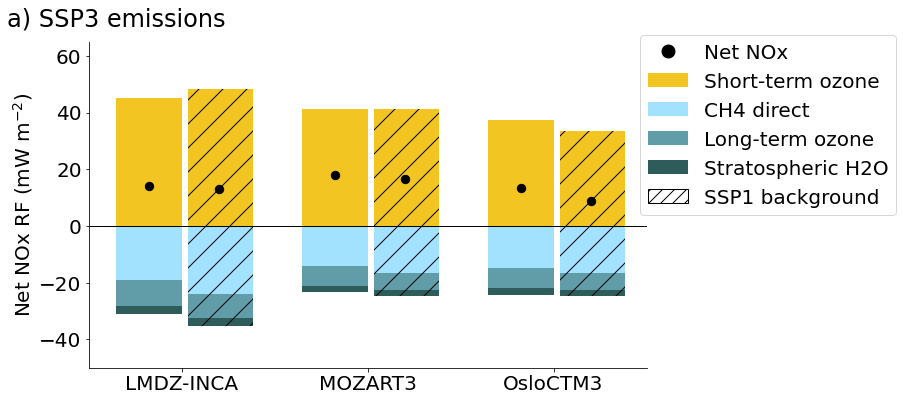

In [9]:
x = np.arange(len(df1.columns))  # X-axis positions should match the number of columns
width = 0.35  # Slightly reduced bar width for spacing

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

colors = ['#f3c522', '#a3e2ff', '#619da9', '#2d5c5b']


# Plot df1 as solid stacked bars (slightly shifted right for spacing)
df1.iloc[:-1, :].T.plot(kind='bar', stacked=True, ax=ax, color=colors, width=width, position=1)

# Plot df2 as hatched stacked bars (slightly shifted left for spacing)
df2.iloc[:-1, :].T.plot(kind='bar', stacked=True, ax=ax, color=colors, width=width, position=-0.1,hatch='/')


# Extract net data (ensure correct shape)
net_data_df1 = df1.iloc[-1, :].values  # Convert to array to match x
net_data_df2 = df2.iloc[-1, :].values  # Convert to array to match x

# Scatter plot for net data (aligned with bar shifts)
ax.scatter(x - 0.175, net_data_df1, color='black', marker='o', label='Net NOx', s=70)
ax.scatter(x + 0.2 , net_data_df2, color='black', marker='o', s=70)

# Formatting
ax.set_ylabel(r'Net NOx RF (mW m$^{-2}$)')
ax.set_xticks(x)
ax.set_xlim(-0.5,2.5)
ax.set_ylim(-50,65)
ax.set_xticklabels(df1.columns, rotation=0)  # Ensure correct labels
ax.axhline(0, color='black', linewidth=1)
ax.spines[['right', 'top']].set_visible(False)

# Legend adjustments
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:5], labels[:5], bbox_to_anchor=(1.05, 1), loc='upper left')


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Net NOx',
                          markerfacecolor='k', markersize=15),
                   Patch(facecolor='#f3c522', label='Short-term ozone'),
                   Patch(facecolor='#a3e2ff', label='CH4 direct'),
                   Patch(facecolor='#619da9', label='Long-term ozone'),
                   Patch(facecolor='#2d5c5b', label='Stratospheric H2O'),
                   Patch(facecolor='w', label='SSP1 background',hatch='//',edgecolor='k')]

# Create the figure
#fig, ax = plt.subplots()
ax.legend(handles=legend_elements, bbox_to_anchor=(0.97, 1.05), loc='upper left')
plt.title('a) SSP3 emissions',x=0.05,y=1.03)
plt.savefig(f'{plotdir}/ACACIA_netNOxRF_Fig5a_SSP3ems.pdf',format='pdf',bbox_inches='tight')

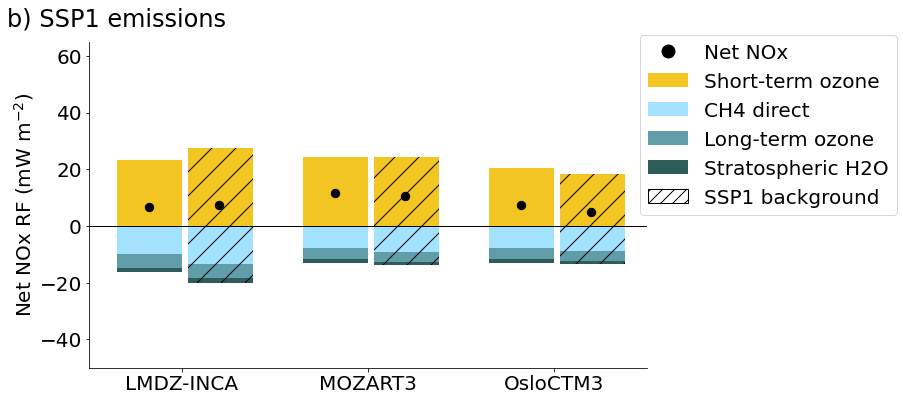

In [10]:
x = np.arange(len(df1.columns))  # X-axis positions should match the number of columns
width = 0.35  # Slightly reduced bar width for spacing

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

colors = ['#f3c522', '#a3e2ff', '#619da9', '#2d5c5b']


# Plot df1 as solid stacked bars (slightly shifted right for spacing)
df3.iloc[:-1, :].T.plot(kind='bar', stacked=True, ax=ax, color=colors, width=width, position=1)

# Plot df2 as hatched stacked bars (slightly shifted left for spacing)
df4.iloc[:-1, :].T.plot(kind='bar', stacked=True, ax=ax, color=colors, width=width, position=-0.1,hatch='/')


# Extract net data (ensure correct shape)
net_data_df1 = df3.iloc[-1, :].values  # Convert to array to match x
net_data_df2 = df4.iloc[-1, :].values  # Convert to array to match x

# Scatter plot for net data (aligned with bar shifts)
ax.scatter(x - 0.175, net_data_df1, color='black', marker='o', label='Net NOx', s=70)
ax.scatter(x + 0.2 , net_data_df2, color='black', marker='o', s=70)

# Formatting
ax.set_ylabel(r'Net NOx RF (mW m$^{-2}$)')
ax.set_xticks(x)
ax.set_xlim(-0.5,2.5)
ax.set_ylim(-50,65)
ax.set_xticklabels(df1.columns, rotation=0)  # Ensure correct labels
ax.axhline(0, color='black', linewidth=1)
ax.spines[['right', 'top']].set_visible(False)

# Legend adjustments
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:5], labels[:5], bbox_to_anchor=(1.05, 1), loc='upper left')


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Net NOx',
                          markerfacecolor='k', markersize=15),
                   Patch(facecolor='#f3c522', label='Short-term ozone'),
                   Patch(facecolor='#a3e2ff', label='CH4 direct'),
                   Patch(facecolor='#619da9', label='Long-term ozone'),
                   Patch(facecolor='#2d5c5b', label='Stratospheric H2O'),
                   Patch(facecolor='w', label='SSP1 background',hatch='//',edgecolor='k')]

# Create the figure
#fig, ax = plt.subplots()
ax.legend(handles=legend_elements, bbox_to_anchor=(0.97, 1.05), loc='upper left')
plt.title('b) SSP1 emissions',x=0.05,y=1.03)
plt.savefig(f'{plotdir}/ACACIA_netNOxRF_Fig5b_SSP1ems.pdf',format='pdf',bbox_inches='tight')

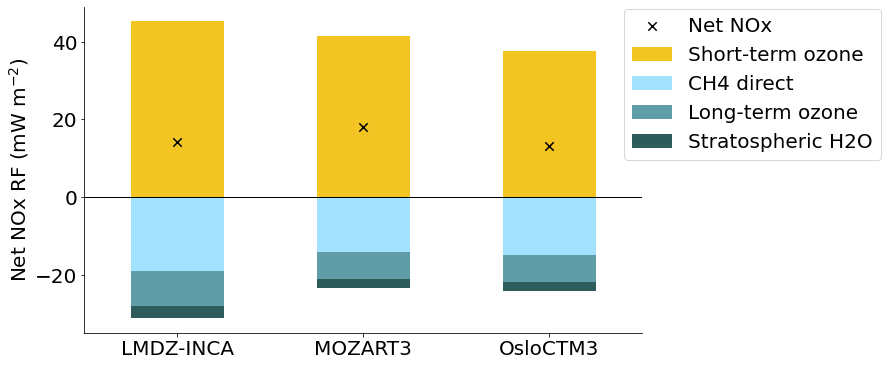

In [12]:
# plot just df1
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

colors = ['#f3c522','#a3e2ff','#619da9','#2d5c5b',]#['#12275c','#a84079','#ff865c','#fff759']#['#003f5c','#ffa600','#7a5195','#ef5675'] ['#12275c','#a84079','#ff865c','#fff759']

# Plot stacked bar chart on the primary axis
df1.iloc[:-1,:].T.plot(kind='bar', stacked=True, ax=ax,color=colors)

net_data = df1.iloc[-1,:]
# Overlay the line plot on the same axis
ax.scatter(net_data.index, net_data, color='black', marker='x', label='Net NOx',s=70)

# Add labels and title
ax.set_ylabel(f'Net NOx RF (mW m$^{{-2}}$)')
#ax.set_xlabel('Model')
#ax.set_title('Stacked Bar Chart with Line Plot on the Same Axis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.axhline(0, color='black',linewidth=1)
ax.spines[['right', 'top']].set_visible(False)
# Add legend to combine both line and bar legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(0.95,0.5))

# Show the plot
plt.show()


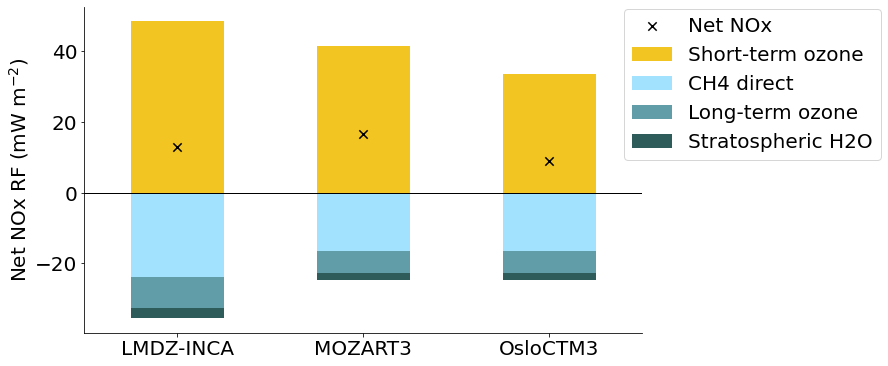

In [13]:
# plot just df2
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

colors = ['#f3c522','#a3e2ff','#619da9','#2d5c5b',]#['#12275c','#a84079','#ff865c','#fff759']#['#003f5c','#ffa600','#7a5195','#ef5675'] ['#12275c','#a84079','#ff865c','#fff759']
# Plot stacked bar chart on the primary axis
df2.iloc[:-1,:].T.plot(kind='bar', stacked=True, ax=ax,color=colors)

net_data = df2.iloc[-1,:]
# Overlay the line plot on the same axis
ax.scatter(net_data.index, net_data, color='black', marker='x', label='Net NOx',s=70)

# Add labels and title
ax.set_ylabel(f'Net NOx RF (mW m$^{{-2}}$)')
#ax.set_xlabel('Model')
#ax.set_title('Stacked Bar Chart with Line Plot on the Same Axis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.axhline(0, color='black',linewidth=1)
ax.spines[['right', 'top']].set_visible(False)
# Add legend to combine both line and bar legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(0.95,0.5))

# Show the plot
plt.show()


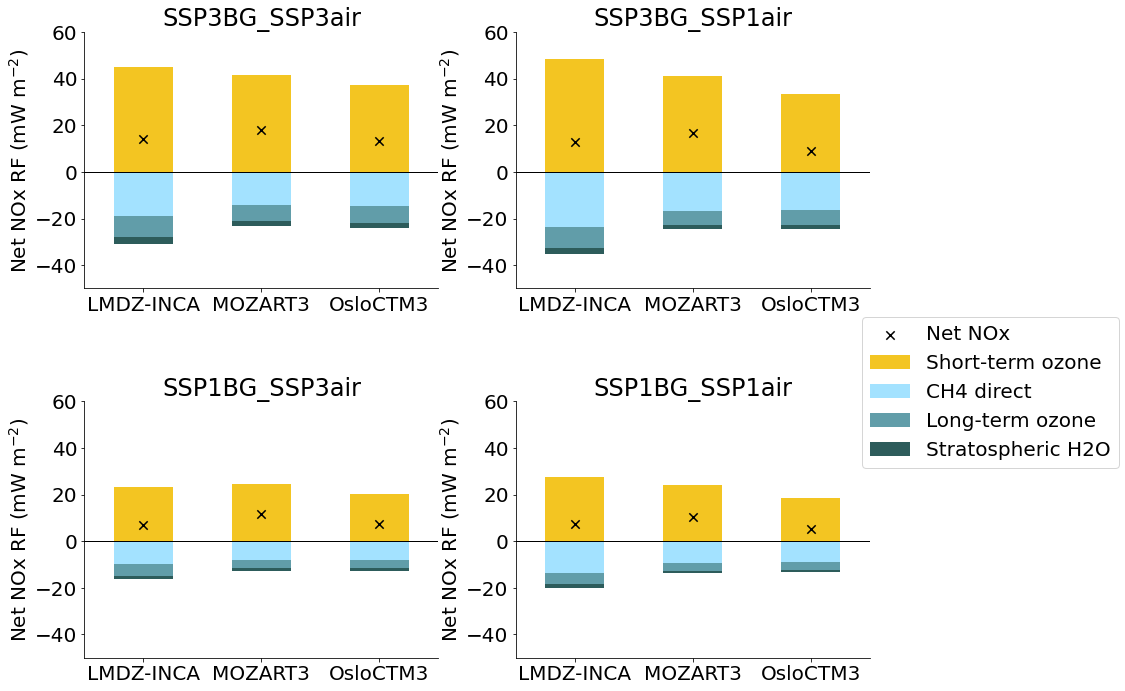

In [14]:
# four experiments plotted separately
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define datasets to plot
datasets = [df1,df2,df3,df4]
labels = ['SSP3BG_SSP3air','SSP3BG_SSP1air','SSP1BG_SSP3air','SSP1BG_SSP1air']

for ax, data,label in zip(axes.flat, datasets, labels):
    # Plot stacked bar chart on the primary axis
    data.iloc[:-1,:].T.plot(kind='bar', stacked=True, ax=ax,color=colors)
    net_data = data.iloc[-1,:]
    # Overlay the line plot on the same axis
    ax.scatter(net_data.index, net_data, color='black', marker='x', label='Net NOx',s=70)
    # Add labels and title
    ax.set_ylabel(f'Net NOx RF (mW m$^{{-2}}$)')
    ax.set_ylim(-50,60)
    ax.set_title(f'{label}')
    ax.get_legend().remove()
    #ax.set_title('Stacked Bar Chart with Line Plot on the Same Axis')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.axhline(0, color='black',linewidth=1)
    ax.spines[['right', 'top']].set_visible(False)
    # Add legend to combine both line and bar legends
    if label == 'SSP1BG_SSP1air':
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels,bbox_to_anchor=(0.95,0.7))



#plt.suptitle('SO4 zonal mean difference',y=0.95)
plt.tight_layout(h_pad=0,w_pad=0)
plt.show()